<a href="https://colab.research.google.com/github/avni2111/Face-Landmark-Detection/blob/main/face_landmark_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face Landmark Detection**

 I developed a model which marks 15 keypoints on a given image of a human face. We'll build a Convolutional Neural Network which takes an image and returns a array of 15 keypoints.

## 1.Importing the pakages

In [3]:
import numpy as np
import tensorflow as tf # importing the necessary libraries


## 2.Loading the Dataset

The original data comes https://www.kaggle.com/datasets/drgilermo/face-images-with-marked-landmark-points#:~:text=more_vert-,Face%20Images%20with%20Marked%20Landmark%20Points,-Data%20Card on Kaggle by Omri Goldstein.

Certain images do not have all the 15 keypoints. So, I've cleaned the dataset and kept only those images which have all the 15 keypoints.

In [4]:
!wget https://github.com/avni2111/Face-Landmark-Detection/blob/main/cleaned_facial_keypoints%20(1).csv # Loading the dataset taken

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `wget https://github.com/avni2111/Face-Landmark-Detection/blob/main/cleaned_facial_keypoints%20(1).csv # Loading the dataset taken'


We'll normalize the images as well as the keypoints. The shape of our input image will be ( 96 , 96 , 1 ) and the expected output will have a shape of ( 1 , 1 , 30 ).

In [11]:
x_train = np.load( "x_train.npy" ) / 255
y_train = np.load( "y_train.npy" ) / 96
x_test = np.load( "x_test.npy" ) / 255
y_test = np.load( "y_test.npy" ) / 96

y_train = np.reshape( y_train , ( -1 , 1 , 1 , 30 ))
y_test = np.reshape( y_test , ( -1 , 1 , 1 , 30 ))

## **3.The CNN Model**
We'll build a CNN model which Conv2D layers

In [12]:
model_layers = [
    tf.keras.layers.SeparableConv2D( 128 , input_shape=( 96 , 96 , 1 ) , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,

    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,

    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,

    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 5 , 5 ) , strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 5 , 5 ) , strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,

    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='sigmoid' ),
]
model = tf.keras.Sequential( model_layers )
model.compile( loss=tf.keras.losses.MeanSquaredError() , optimizer=tf.keras.optimizers.Adam( learning_rate=0.0001 ) , metrics=[ 'mse' ] )
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_separable_conv.py:104: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ separable_conv2d (SeparableConv2D)   │ (None, 92, 92, 128)         │             281 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 92, 92, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 92, 92, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_1 (SeparableConv2D) │ (None, 88, 88, 128)         │          19,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 88, 88, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 88, 88, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_2 (SeparableConv2D) │ (None, 84, 84, 128)         │          19,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_3 (SeparableConv2D) │ (None, 80, 80, 128)         │          19,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_4 (SeparableConv2D) │ (None, 76, 76, 128)         │          19,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 76, 76, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 76, 76, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_5 (SeparableConv2D) │ (None, 72, 72, 128)         │          19,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 72, 72, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 72, 72, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_6 (SeparableConv2D) │ (None, 68, 68, 128)         │          19,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_7 (SeparableConv2D) │ (None, 64, 64, 128)         │          19,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_8 (SeparableConv2D) │ (None, 60, 60, 128)         │          19,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 60, 60, 128)         │              

 Total params: 259,973 (1015.52 KB)

 Trainable params: 258,181 (1008.52 KB)

 Non-trainable params: 1,792 (7.00 KB)

## 4.Training the Model

In [13]:
model.fit( x_train , y_train , epochs=25 , batch_size=50 , validation_data=( x_test , y_test ) )

Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 816s 26s/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0380 - val_mse: 0.0380
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 768s 26s/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0378 - val_mse: 0.0378
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 760s 25s/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 820s 26s/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 789s 26s/step - loss: 0.0375 - mse: 0.0375 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 784s 25s/step - loss: 0.0368 - mse: 0.0368 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 778s 24s/step - loss: 0.0365 - mse: 0.0365 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 737s 24s/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 9/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 740s 24s/step - lo

## 5.Generate keypoints for Images

We will generate keypoints for 15 images from our test dataset.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


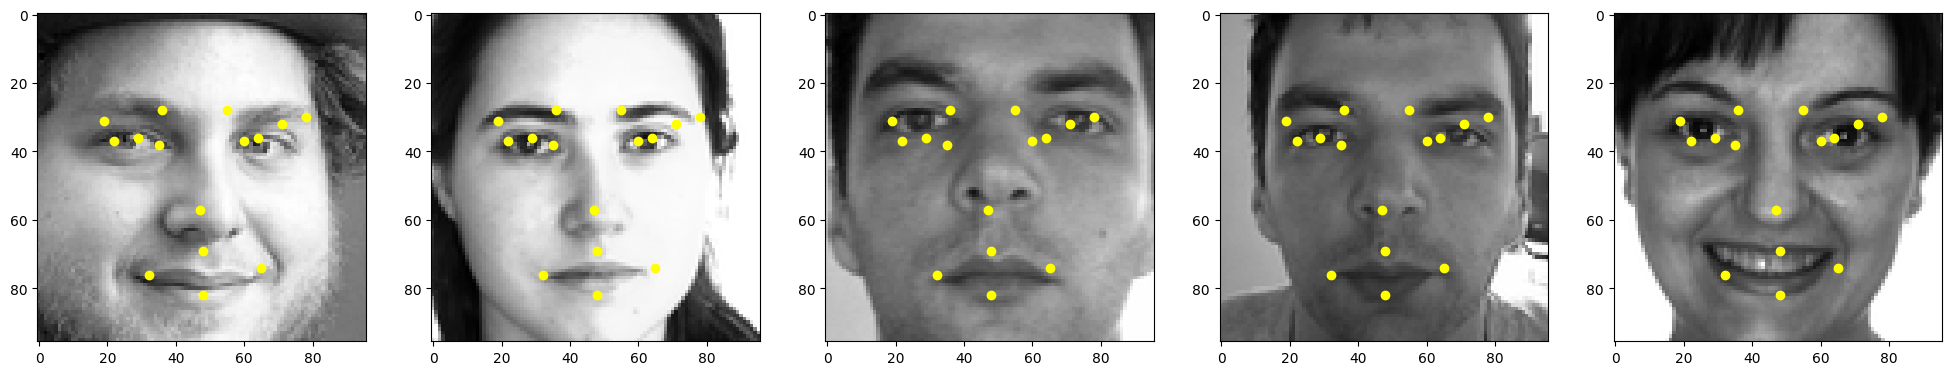

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=( 50 , 50 ))

for i in range( 1 , 6 ):
    sample_image = np.reshape( x_test[i] * 255  , ( 96 , 96 ) ).astype( np.uint8 )
    pred = model.predict( x_test[ i : i +1  ] ) * 96
    pred = pred.astype( np.int32 )
    pred = np.reshape( pred[0 , 0 , 0 ] , ( 15 , 2 ) )
    fig.add_subplot( 1 , 10 , i )
    plt.imshow( sample_image.T , cmap='gray' )
    plt.scatter( pred[ : , 0 ] , pred[ : , 1 ] , c='yellow' )

plt.show()


# 6.Take a Picture and Predict landmarks for it

In [15]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


Run this code cell. You'll see a camera  and a "Capture" button.When You'll take a picture, it will be saved as photo.jpg.

<IPython.core.display.Javascript object>

Saved to photo.jpg


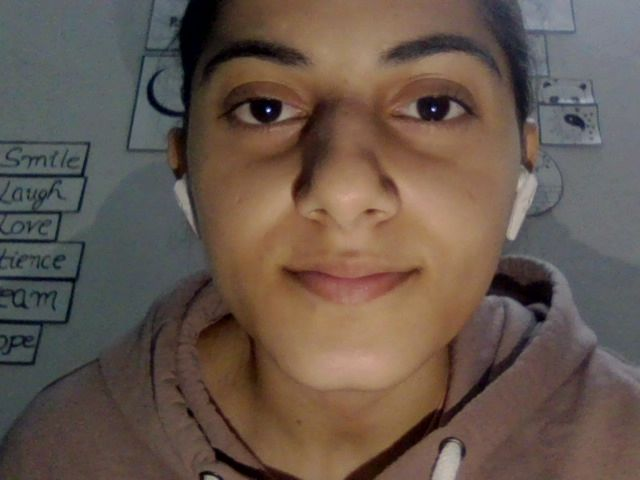

In [22]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

We'll get the photo.jpg, resize the image taken ( 96 , 96 ) and feed it to our model. The predictions will then be shown on the image.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


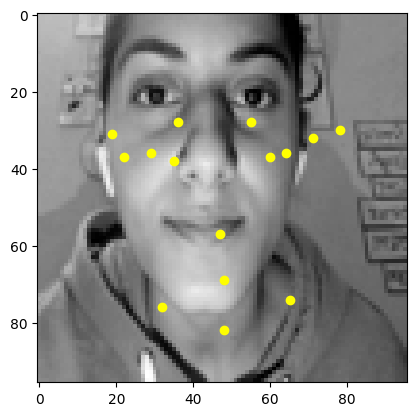

In [23]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open( "photo.jpg").convert('L').resize( ( 96 , 96 ) ).rotate( 90 )
image_arr = np.asarray( image ) / 255

pred = model.predict( np.array( [ image_arr.reshape( 96 , 96 , 1 ) ] ) ) * 96
pred = pred.astype( np.int32 )
pred = np.reshape( pred[0 , 0 , 0 ] , ( 15 , 2 ) )

plt.imshow( image_arr.T , cmap='gray' )
plt.scatter( pred[ : , 0 ] , pred[ : , 1 ] , c='yellow' )
plt.show()
